### Define funcion in Python

In [1]:
# mendefinisikan fungsi 

def penjumlahan(a,b):
    c = a + b 
    return c 

hasil = penjumlahan(2, 3)

print(hasil)

5


In [3]:
def print_data(data):
    print(data)

    
teks = "Hello World"
print_data(teks)

Hello World


### Single Layer Perceptron from scratch

- Permasalahan yang akan coba diselesaikan tentang *binary classification* logika AND

| A | B | Out |
|---|---|-----|
| 1 | 1 | 1   |
| 1 | 0 | 0   |
| 0 | 1 | 0   |
| 0 | 0 | 0   |

#### Learning SLP :

1. Preparasi data
2. Inisialisasi hyperparameter \
$w, b , η$
3. Itrasi fungsi berikut sampai $Δw$ <= threshold, \
\
untuk tiap input data $x$ dengan target $t$, \
&emsp;&emsp;$y = \sum_ {}{}{x w} + b$ \
\
&emsp;&emsp;apply activation function (sigmoid) : \
&emsp;&emsp;$f(x) = \frac{1}{1+e^{-x}} $\
\
&emsp;&emsp;calculate error :\
&emsp;&emsp;$\epsilon = t — f(x)$ \
&emsp;&emsp;if $\epsilon$ <= threshold, \
&emsp;&emsp;&emsp;&emsp;stop \
&emsp;&emsp;else, \
&emsp;&emsp;&emsp;&emsp;update $w$, $△w = (y — f(x)).η.x$ \
&emsp;&emsp;&emsp;&emsp;update $b$, $△b = (y — f(x)).η$ 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

- define hyperparameter
- define dataset (x,y)
- define initial weight & bias

In [6]:
NUM_ITER = 1000
learning_rate = 0.01

# define x & y
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], np.float16)
y = np.array([0, 0, 0, 1], np.float16)

# initial weight & bias
W = np.array([0.1, 0.1])
b = -0.10000002 

- selanjutnya hitung $y_{pred}$ \
$y_{pred} = \begin{bmatrix} 0 & 0\\ 0 & 1 \\ 1 & 0\\ 1 & 1\end{bmatrix}\cdot\begin{bmatrix} w_{1} & w_{2} \end{bmatrix} + b$ 



- apply activation funtion :
![](resource/sigmoid.png)



- update $w$ adn $b$,\
$△w = (y — f(x)) * η * x$ \
$△b = (y — f(x)) * η$ \
\
$w_{new} = w_{old} + △w$ \
$b_{new} = b_{old} + △b$

In [7]:
errors = []

for i in range(NUM_ITER):
    y_pred = np.dot(x, W) + b
        
    #apply activation
    fx = 1/(1 + np.exp(-y_pred))
    
    #calculate error (MSE)
    d = y - fx
    err = np.square(d).mean()
    
    #stop if error <= 0.05
    if err <= 0.005:
        break
    
    #update w & b
    delta_W = learning_rate * np.dot(np.transpose(x) , d)
    delta_b = learning_rate * np.sum(d)
    W = W + delta_W
    b = b + delta_b
    
    errors.append(err)
    print ("Iterasi ke-%d \t" % i, "%.4f\t" % err, W, b)

Iterasi ke-0 	 0.2378	 [0.09975021 0.09975021] -0.11000001980024958
Iterasi ke-1 	 0.2366	 [0.09955223 0.09955223] -0.11989764984964922
Iterasi ke-2 	 0.2354	 [0.09940518 0.09940518] -0.12969445427166487
Iterasi ke-3 	 0.2342	 [0.09930818 0.09930818] -0.1393919580699025
Iterasi ke-4 	 0.2330	 [0.09926035 0.09926035] -0.14899166696751415
Iterasi ke-5 	 0.2319	 [0.09926086 0.09926086] -0.15849506727831345
Iterasi ke-6 	 0.2307	 [0.09930885 0.09930885] -0.16790362580765444
Iterasi ke-7 	 0.2296	 [0.09940349 0.09940349] -0.17721878978120378
Iterasi ke-8 	 0.2286	 [0.09954396 0.09954396] -0.18644198679981408
Iterasi ke-9 	 0.2275	 [0.09972945 0.09972945] -0.19557462481878135
Iterasi ke-10 	 0.2265	 [0.09995917 0.09995917] -0.20461809214984605
Iterasi ke-11 	 0.2255	 [0.10023233 0.10023233] -0.21357375748437057
Iterasi ke-12 	 0.2245	 [0.10054815 0.10054815] -0.22244296993619933
Iterasi ke-13 	 0.2235	 [0.10090588 0.10090588] -0.23122705910277905
Iterasi ke-14 	 0.2226	 [0.10130475 0.1013047

Iterasi ke-123 	 0.1684	 [0.28079111 0.28079111] -0.8811437107972164
Iterasi ke-124 	 0.1681	 [0.28304065 0.28304065] -0.8853662058258525
Iterasi ke-125 	 0.1678	 [0.28529403 0.28529403] -0.8895716126599218
Iterasi ke-126 	 0.1675	 [0.28755114 0.28755114] -0.893760143126614
Iterasi ke-127 	 0.1672	 [0.28981187 0.28981187] -0.897932005794907
Iterasi ke-128 	 0.1669	 [0.2920761 0.2920761] -0.9020874060298768
Iterasi ke-129 	 0.1666	 [0.29434375 0.29434375] -0.9062265460460268
Iterasi ke-130 	 0.1663	 [0.29661469 0.29661469] -0.9103496249596549
Iterasi ke-131 	 0.1660	 [0.29888884 0.29888884] -0.9144568388402775
Iterasi ke-132 	 0.1657	 [0.30116609 0.30116609] -0.918548380761129
Iterasi ke-133 	 0.1654	 [0.30344633 0.30344633] -0.922624440848754
Iterasi ke-134 	 0.1651	 [0.30572949 0.30572949] -0.9266852063317103
Iterasi ke-135 	 0.1648	 [0.30801545 0.30801545] -0.9307308615884002
Iterasi ke-136 	 0.1645	 [0.31030413 0.31030413] -0.9347615881940469
Iterasi ke-137 	 0.1642	 [0.31259543 0.3

Iterasi ke-279 	 0.1308	 [0.63815876 0.63815876] -1.414103395011732
Iterasi ke-280 	 0.1306	 [0.64035073 0.64035073] -1.4170192420771497
Iterasi ke-281 	 0.1304	 [0.64254062 0.64254062] -1.4199310342047078
Iterasi ke-282 	 0.1302	 [0.6447284 0.6447284] -1.422838795253965
Iterasi ke-283 	 0.1301	 [0.64691409 0.64691409] -1.4257425487946478
Iterasi ke-284 	 0.1299	 [0.64909768 0.64909768] -1.428642318110865
Iterasi ke-285 	 0.1297	 [0.65127915 0.65127915] -1.4315381262052547
Iterasi ke-286 	 0.1295	 [0.65345852 0.65345852] -1.4344299958030717
Iterasi ke-287 	 0.1293	 [0.65563576 0.65563576] -1.4373179493562112
Iterasi ke-288 	 0.1291	 [0.65781089 0.65781089] -1.4402020090471717
Iterasi ke-289 	 0.1289	 [0.65998389 0.65998389] -1.443082196792959
Iterasi ke-290 	 0.1287	 [0.66215476 0.66215476] -1.4459585342489307
Iterasi ke-291 	 0.1286	 [0.6643235 0.6643235] -1.4488310428125823
Iterasi ke-292 	 0.1284	 [0.66649011 0.66649011] -1.451699743627276
Iterasi ke-293 	 0.1282	 [0.66865458 0.6686

Iterasi ke-402 	 0.1104	 [0.89162863 0.89162863] -1.7476135444139496
Iterasi ke-403 	 0.1102	 [0.89355774 0.89355774] -1.7501497066925502
Iterasi ke-404 	 0.1101	 [0.89548482 0.89548482] -1.752683431252767
Iterasi ke-405 	 0.1100	 [0.89740987 0.89740987] -1.7552147250319052
Iterasi ke-406 	 0.1098	 [0.89933289 0.89933289] -1.757743594914707
Iterasi ke-407 	 0.1097	 [0.90125388 0.90125388] -1.7602700477340198
Iterasi ke-408 	 0.1095	 [0.90317285 0.90317285] -1.7627940902714538
Iterasi ke-409 	 0.1094	 [0.9050898 0.9050898] -1.7653157292580308
Iterasi ke-410 	 0.1093	 [0.90700474 0.90700474] -1.7678349713748231
Iterasi ke-411 	 0.1091	 [0.90891767 0.90891767] -1.7703518232535833
Iterasi ke-412 	 0.1090	 [0.91082858 0.91082858] -1.7728662914773647
Iterasi ke-413 	 0.1088	 [0.91273749 0.91273749] -1.7753783825811331
Iterasi ke-414 	 0.1087	 [0.9146444 0.9146444] -1.7778881030523692
Iterasi ke-415 	 0.1086	 [0.9165493 0.9165493] -1.780395459331663
Iterasi ke-416 	 0.1084	 [0.91845221 0.9184

Iterasi ke-589 	 0.0883	 [1.22045841 1.22045841] -2.1851541003053834
Iterasi ke-590 	 0.0882	 [1.22206308 1.22206308] -2.1873197407498757
Iterasi ke-591 	 0.0881	 [1.2236663 1.2236663] -2.1894837404434053
Iterasi ke-592 	 0.0880	 [1.22526808 1.22526808] -2.1916461021889035
Iterasi ke-593 	 0.0879	 [1.22686841 1.22686841] -2.1938068287807435
Iterasi ke-594 	 0.0879	 [1.22846731 1.22846731] -2.1959659230047945
Iterasi ke-595 	 0.0878	 [1.23006477 1.23006477] -2.1981233876384745
Iterasi ke-596 	 0.0877	 [1.2316608 1.2316608] -2.200279225450802
Iterasi ke-597 	 0.0876	 [1.2332554 1.2332554] -2.2024334392024496
Iterasi ke-598 	 0.0875	 [1.23484857 1.23484857] -2.2045860316457944
Iterasi ke-599 	 0.0874	 [1.23644032 1.23644032] -2.206737005524969
Iterasi ke-600 	 0.0873	 [1.23803065 1.23803065] -2.2088863635759113
Iterasi ke-601 	 0.0872	 [1.23961956 1.23961956] -2.211034108526415
Iterasi ke-602 	 0.0871	 [1.24120705 1.24120705] -2.2131802430961782
Iterasi ke-603 	 0.0870	 [1.24279313 1.2427

Iterasi ke-751 	 0.0747	 [1.4632997 1.4632997] -2.516340128728868
Iterasi ke-752 	 0.0746	 [1.46470178 1.46470178] -2.5182716686967557
Iterasi ke-753 	 0.0745	 [1.46610279 1.46610279] -2.5202019362734442
Iterasi ke-754 	 0.0745	 [1.46750272 1.46750272] -2.522130933311473
Iterasi ke-755 	 0.0744	 [1.46890158 1.46890158] -2.524058661659224
Iterasi ke-756 	 0.0743	 [1.47029936 1.47029936] -2.5259851231609316
Iterasi ke-757 	 0.0743	 [1.47169608 1.47169608] -2.5279103196567005
Iterasi ke-758 	 0.0742	 [1.47309173 1.47309173] -2.5298342529825155
Iterasi ke-759 	 0.0741	 [1.47448631 1.47448631] -2.531756924970257
Iterasi ke-760 	 0.0740	 [1.47587983 1.47587983] -2.533678337447713
Iterasi ke-761 	 0.0740	 [1.47727228 1.47727228] -2.535598492238593
Iterasi ke-762 	 0.0739	 [1.47866368 1.47866368] -2.53751739116254
Iterasi ke-763 	 0.0738	 [1.48005401 1.48005401] -2.539435036035145
Iterasi ke-764 	 0.0737	 [1.48144329 1.48144329] -2.54135142866796
Iterasi ke-765 	 0.0737	 [1.48283152 1.48283152

Iterasi ke-882 	 0.0660	 [1.63842858 1.63842858] -2.7591706386491017
Iterasi ke-883 	 0.0660	 [1.63970377 1.63970377] -2.7609498864358604
Iterasi ke-884 	 0.0659	 [1.6409781 1.6409781] -2.7627280733305595
Iterasi ke-885 	 0.0659	 [1.64225156 1.64225156] -2.7645052007346513
Iterasi ke-886 	 0.0658	 [1.64352415 1.64352415] -2.766281270046743
Iterasi ke-887 	 0.0657	 [1.64479588 1.64479588] -2.7680562826626027
Iterasi ke-888 	 0.0657	 [1.64606674 1.64606674] -2.7698302399751698
Iterasi ke-889 	 0.0656	 [1.64733674 1.64733674] -2.7716031433745596
Iterasi ke-890 	 0.0656	 [1.64860588 1.64860588] -2.7733749942480728
Iterasi ke-891 	 0.0655	 [1.64987416 1.64987416] -2.7751457939802022
Iterasi ke-892 	 0.0654	 [1.65114158 1.65114158] -2.7769155439526405
Iterasi ke-893 	 0.0654	 [1.65240814 1.65240814] -2.7786842455442864
Iterasi ke-894 	 0.0653	 [1.65367384 1.65367384] -2.7804519001312533
Iterasi ke-895 	 0.0653	 [1.65493869 1.65493869] -2.782218509086877
Iterasi ke-896 	 0.0652	 [1.65620269 1

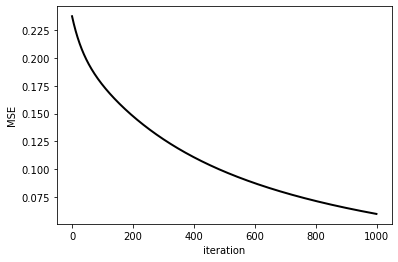

In [8]:
plt.plot(errors, color='k', linewidth=2)
plt.xlabel("iteration")
plt.ylabel("MSE")

plt.show()

In [9]:
x_test = np.array([[0.0, 0.0],
                    [1.0, 0.0],
                    [0.0, 1.0],
                    [1.0, 1.0]])

for x_test_item in x_test :
    y_test = np.dot(x_test_item, W) + b
    y_test = 1/(1 + np.exp(-y_test))
    
    print('%.1f\t' % x_test_item[0] + ' AND \t' + '%.1f\t' %x_test_item[1] + ' = ' + '%.1f\t' %y_test)

0.0	 AND 	0.0	 = 0.0	
1.0	 AND 	0.0	 = 0.2	
0.0	 AND 	1.0	 = 0.2	
1.0	 AND 	1.0	 = 0.6	


W:[1.7820535 1.7820535]
b:-2.960488068885769
plot_y: [1.86   0.4614]


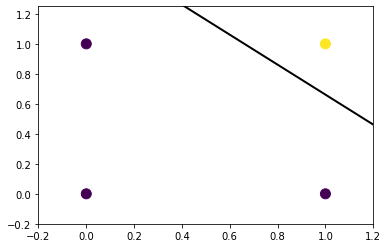

In [10]:
# plot lineary separable class (logic AND)
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])

plot_y = - 1 / W[1] * (W[0] * plot_x + b) 
 
print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

___
___
___

# Multi Layer Perceptron menggunakan Keras

___
___
___


![](resource/iris-species.png)
### Iris Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems.

- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

Label description :
- Id
- SepalLengthCm : Length of the sepal (in cm)
- SepalWidthCm : Width of the sepal (in cm)
- PetalLengthCm : Length of the petal (in cm)
- PetalWidthCm : Width of the petal (in cm)
- Species : Species name (target data)

Dataset :https://www.kaggle.com/uciml/iris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_df = pd.read_csv("datasets_19_420_Iris.csv")

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.drop('Id', axis=1, inplace=True)

In [6]:
IrisGroupedClass = iris_df['Species'].value_counts()

In [7]:
IrisGroupedClass

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

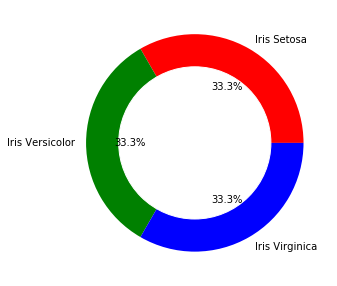

In [21]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(IrisGroupedClass, 
        labels=['Iris Setosa','Iris Versicolor', 'Iris Virginica'], 
        colors=['red','green', 'blue'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

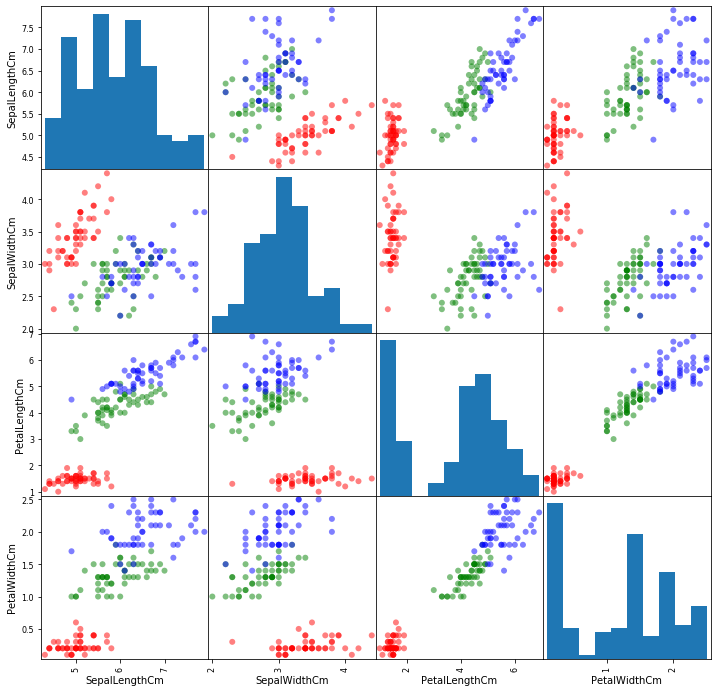

In [22]:
prop = {'Iris-setosa' : 'red',
        'Iris-versicolor' : 'green', 
        'Iris-virginica' : 'blue'}
color = [ prop[item] for item in iris_df['Species'].values]

ax = pd.plotting.scatter_matrix(iris_df, figsize=(12, 12), marker='o', c=color)

___

![](resource/sklearn.PNG)

In [8]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical


Using TensorFlow backend.


- Define input & ouput vector
- Encode categorical label into numerical value using `LabelEncoder()`

In [10]:
X = iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values

In [11]:
le = LabelEncoder()
le.fit(iris_df["Species"].values)
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
Y = le.transform(iris_df["Species"].values)
Y = to_categorical(Y)

- split dataset with split ratio 75% train , 25% test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

![](resource/keras.PNG)

- Keras API : https://keras.io/api/


- Membuat model pad Keras :
```
from keras.models import Sequential
model = Sequential()
model.add(...)
model.add(...)
model.add(...)
```


- Add input layer pada Keras : **Layer pertama** pada Keras harus menyertakan `input_dim` atau `input_shape`,
```
Dense(16, input_dim=8)
```


- Hidden layer & Activation Layer
```
Dense(16, activation='relu')
```
- atau dapat ditulis sebagai berikut secara terpisah :
```
Dense(16)
Activation("relu")
```


- config network menggunakan `model.compile()`
    - loss 
    - optimizer
    - metric
    
```
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy', precision, recall])
```


- training model :
```
model.fit(X, y, epochs=, batch_size=)
```

- menggunakan Keras untuk membuat model Multi Layer Perceptron

In [16]:
from keras.models import Sequential

from keras.layers import Dense, Activation
from keras.layers import Input
from keras.models import Model

import keras
from keras import backend as K

In [20]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [33]:
def mlp_model(max_len):
    
    model = Sequential()
    
    model.add(Dense(32, 
                    activation= 'relu',
                    input_shape=(max_len,)))
    model.add(Dense(64, activation= 'relu'))
    model.add(Dense(16, activation= 'relu'))
    model.add(Dense(8, activation= 'relu'))
    model.add(Dense(3))
    model.add(Activation("softmax"))
    
    # print model network
    model.summary() 
    
    # config model : add optimizer, loss & metrics
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

## optimizer,  loss, metrics

- Saat melakukan proses training, model parameter (weight) akan diupdate agar mendapatkan nilai `loss` yang minimal dan menghasilkan prediksi yang benar sebanyak mungkin yang dapat ditunjukan oleh `metric`, 
- Namun bagaimana cara mengubah parameter pada model? seberapa besar harus diubah? maka dari itu hadirlah `optimizer`.
- `Optimizer` melakukan update pada model parameter berdasarkan output `loss` function.
- `loss` memberitau `optimizer` apakah ia bergerak kearah yang benar atau tidak.

### ilustrasi 

> `Optimizer` dan `loss` bisa dibayangkan sebagai karyawan yang baru pertama kali datang ke kantor. 
Hari pertama, dia coba menggunakan kereta untuk sampai ke kantor yang ternyata menempuh sekitar 2 jam. 
Di hari berikutnya dia mendapatkan kabar dari rekannya bahwa bus juga dapat mengantarkan kita ke kantor, dia coba naik bus, dan ternyata memakan waktu 1.5jam. 
Besoknya lagi dia diberi info oleh rekan nya yang lain jika menggunakan taxi bisa lebih cepat, sehingga hari itu naik taxi untuk sampai kantor dan dapat ditempuh hanya dalam waktu 1 jam.
- `Optimizer` adalah cara menuju kantor, sedangkan `loss` adalah durasi untuk sampai kantor.


### Jenis Optimizer di Keras
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

#### Perbandingan performace antar optimizer
![](resource/Optimizer-neural-networks-on-MNIST.png)
(sumber [link](https://www.researchgate.net/figure/Comparison-of-different-optimizer-by-training-of-multilayer-neural-networks-on-MNIST_fig1_324808725))

#### SGD vs Adam Optimizer
- SGD Optimizer
```
tf.keras.optimizers.SGD(
    learning_rate=0.01, 
    momentum=0.0, 
    nesterov=False, 
    name="SGD", 
    **kwargs
)
```
- update weight pada SGD saat momentum = 0.0
```
w = w - learning_rate * g
```
- update weight pada SGD saat momentum > 0.0
```
velocity = momentum * velocity - learning_rate * g
w = w * velocity
```
- `momentum` : mempercepat penurunan gradien ke arah yang relevan dan mengurangi osilasi.
\

- Adam Optimizer (adaptive moment estimation)
```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
```
- `Adam` compute adaptive learning rates for each parameter using first and second moment of gradien.
- `Adam` memiliki kemampuan fast convergency 
![](resource/saddle.gif)
(sumber [link](https://rnrahman.com/blog/visualising-stochastic-optimisers/))
- Animasi diatas menunjukan prilaku optimizer pada saddle point.
- `SGD` stuck dan sulit untuk bergerak kearah minimum
- Sementara optimizer dengan adaptive learning rate seperti `Adam` sangat cepat untuk turun ke karah minimum 


### Jenis Loss Di Keras
- **Probabilistic losses**
    - BinaryCrossentropy class
    - CategoricalCrossentropy class
- **Regression losses**
    - MeanSquaredError class
- selengkapnya : https://keras.io/api/losses/

### Jenis Metric di Keras
- **Accuracy metrics**
    - Accuracy class 
- ~~**Classification metrics based on True/False positives & negatives**~~ 
    - ~~Precision class~~ 
    - ~~Recall class~~
- Precision & Recall di hilagkan dari `keras` 2.0 keatas [sumber](https://github.com/keras-team/keras/wiki/Keras-2.0-release-notes)
- selengkapnya : https://keras.io/api/metrics/

- lakukan training dengan menggunakan `model.fit()` 

In [34]:
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val,y_val))
    return hist 

- call function `check_model()` dan `mlp_model()`
- jalankan training dengan `EPOCHS` dan `BATCH_SIZE` yang telah diset.


- `BATCH_SIZE` merupakan banyaknya sample yang akan di propagasikan kedalam Network
- Benefit menggunakan `BATCH_SIZE` < training sample
    - less memory to consume : karena menggunakan sedikit data saat diproses dalam network
    - network lebih cepat melakukan proses learning 
- Penggunaan `BATCH_SIZE` terlalu kecil dapat mengakibatkan gradient update fluktuatif
- 1 `EPOCH` artinya 1 forwardpass dan backwardpass untuk keseluruhan training sample
- Jumlah `ITERASI` banyaknya forwardpass dan backwardpass untuk tiap `BATCH_SIZE`


- contoh :
    - kita memiliki 1000 training sample
    - kita pilih `BATCH_SIZE` 10 dan `EPOCH` 5
    - sehingga pada tiap `EPOCH` akan dilakukan forwardpass dan backwardpass untuk 1000 training sample yang dibagi meenjadi 10 batch, dimana tiap batch nya akan diproses 100 sample.
    - Proses ini akan menghasilkan setidaknya 100x5 iterasi (forwardpass dan backwardpass).

In [35]:
max_len = X_train.shape[1]  

EPOCHS = 200
BATCH_SIZE = 16

model = mlp_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 27        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 3,475
Trainable params: 3,475
Non-trainable params: 0
____________________________________________________

Epoch 32/200
112/112 [==============================] - 0s 295us/step - loss: 0.1725 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.1029 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 33/200
112/112 [==============================] - 0s 321us/step - loss: 0.1642 - accuracy: 0.9464 - precision: 0.9464 - recall: 0.9464 - val_loss: 0.1059 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 34/200
112/112 [==============================] - 0s 554us/step - loss: 0.1518 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.0942 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 35/200
112/112 [==============================] - 0s 375us/step - loss: 0.1459 - accuracy: 0.9643 - precision: 0.9643 - recall: 0.9643 - val_loss: 0.0938 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 36/200
112/112 [==============================] - 0s 241us/step - loss: 0.1280 - a

Epoch 68/200
112/112 [==============================] - 0s 366us/step - loss: 0.0896 - accuracy: 0.9821 - precision: 0.9821 - recall: 0.9821 - val_loss: 0.0456 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 69/200
112/112 [==============================] - 0s 518us/step - loss: 0.0841 - accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554 - val_loss: 0.0768 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 70/200
112/112 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.000 - 0s 491us/step - loss: 0.0932 - accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554 - val_loss: 0.0440 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 71/200
112/112 [==============================] - 0s 571us/step - loss: 0.0729 - accuracy: 0.9911 - precision: 0.9911 - recall: 0.9911 - val_loss: 0.0737 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 72

112/112 [==============================] - 0s 339us/step - loss: 0.0797 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0479 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 104/200
112/112 [==============================] - 0s 455us/step - loss: 0.0725 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0410 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 105/200
112/112 [==============================] - 0s 366us/step - loss: 0.0817 - accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554 - val_loss: 0.0515 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 106/200
112/112 [==============================] - 0s 438us/step - loss: 0.0613 - accuracy: 0.9821 - precision: 0.9821 - recall: 0.9821 - val_loss: 0.0322 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 107/200
112/112 [==============================] - 0s 393us/step - loss: 0.0727 - accuracy: 

112/112 [==============================] - 0s 393us/step - loss: 0.0812 - accuracy: 0.9643 - precision: 0.9643 - recall: 0.9643 - val_loss: 0.0574 - val_accuracy: 0.9737 - val_precision: 0.9792 - val_recall: 0.9792
Epoch 139/200
112/112 [==============================] - 0s 335us/step - loss: 0.0701 - accuracy: 0.9821 - precision: 0.9821 - recall: 0.9821 - val_loss: 0.0291 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 140/200
112/112 [==============================] - 0s 455us/step - loss: 0.0769 - accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554 - val_loss: 0.0863 - val_accuracy: 0.9211 - val_precision: 0.9375 - val_recall: 0.9375
Epoch 141/200
112/112 [==============================] - 0s 321us/step - loss: 0.0684 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0293 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 142/200
112/112 [==============================] - 0s 643us/step - loss: 0.0887 - accuracy: 

Epoch 174/200
112/112 [==============================] - 0s 384us/step - loss: 0.0674 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0272 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 175/200
112/112 [==============================] - 0s 393us/step - loss: 0.0712 - accuracy: 0.9643 - precision: 0.9643 - recall: 0.9643 - val_loss: 0.0394 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 176/200
112/112 [==============================] - 0s 321us/step - loss: 0.0618 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0288 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 177/200
112/112 [==============================] - 0s 339us/step - loss: 0.0619 - accuracy: 0.9732 - precision: 0.9732 - recall: 0.9732 - val_loss: 0.0378 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 178/200
112/112 [==============================] - 0s 339us/step - loss: 0.063

- Plot history accuracy , precision dan recall untuk training set dan validation set 

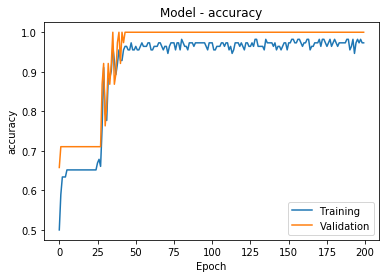

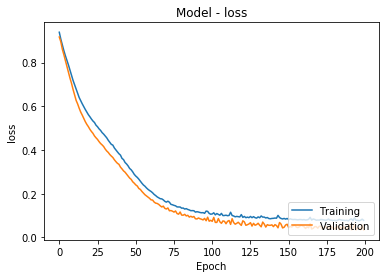

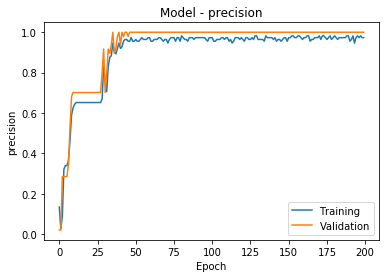

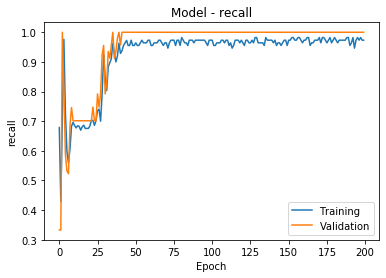

In [29]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model_(history)

- pada plot accuracy untuk validation data terlihat lebih **fluktuatif**, apakah ini normal?
- ini bisa diakibatkan oleh `BATCH_SIZE` yang **terlalu kecil**, seperti contohnya jika pada dataset terdapat misslabeled data yang mengakibatkan nilai loss meningkat atau menjauhkannya dari local minima.
- efek ini bisa dihindari jika kita memilih `BATCH_SIZE` lebih besar. 
- Namun `BATCH_SIZE` yang **terlalu besar** dapat mengakibatkan **training** process menjadi lebih berat dan **lambat**.
- selain itu `BATCH_SIZE` **terlalu besar** akan mengakibatkan **generalization** pada model menjadi **jelek** (sumber [link](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e#:~:text=large%20batch%20size%20means%20the,all%20about%20the%20same%20size.))
- **Generalization** merupakan salah satu kemampuan Neural Network yang artinya model mampu mengklasifikasikan data yang tidak pernah dilihat sebelumnya (*unseen data*) (sumber [link](http://www.eie.polyu.edu.hk/~enzheru/snns/SNNSinfo/UserManual/node16.html#:~:text=Learning%20in%20Neural-,Generalization%20of%20Neural%20Networks,it%20has%20never%20seen%20before.))

In [36]:
model.save("model-iris.h5")

- Define function to Calculate & Plot Confusion Matrix

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

- Predict test dataset
- plot confusion matrix

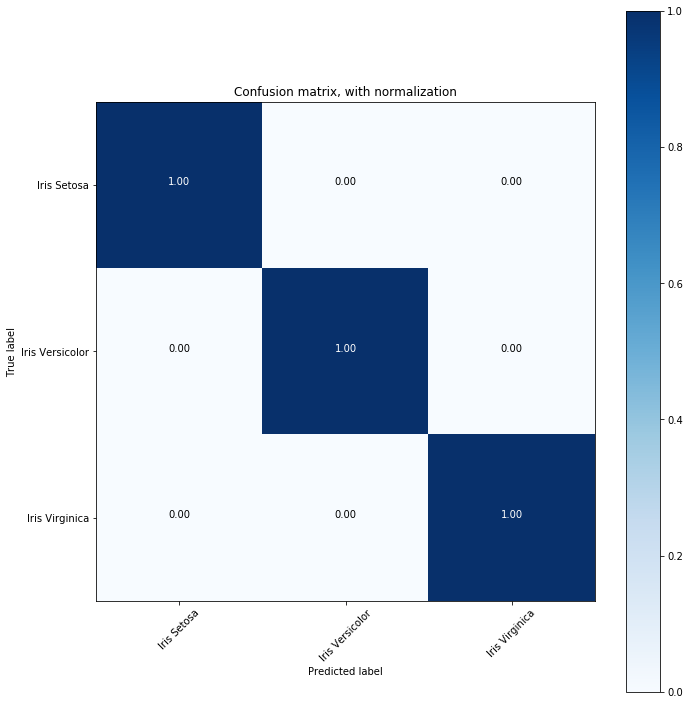

In [31]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Iris Setosa','Iris Versicolor', 'Iris Virginica'],normalize=True,
                      title='Confusion matrix, with normalization')


- Calculate metric report menggunakan `classification_report()` pada `scikit-learn` 

In [32]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Iris Setosa','Iris Versicolor', 'Iris Virginica']))

                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        15
Iris Versicolor       1.00      1.00      1.00        11
 Iris Virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



- Terlihat jika `recall` pada class `Iris Veriscolor` rendah (0.36), sedangkan `precision` nya tinggi (1.00)
- Dengan kata lain hanya 36%  `Iris Veriscolor` yang berhasil diprediksi sebagai  `Iris Veriscolor`,

- Namun demikian dari hasil prediksi `Iris Veriscolor` 100% merupakan `Iris Veriscolor`

- Konsep Precision & Recall

![](resource/prec-rec-v3.png)

___

### Selanjutnya ?
- Meningkatkan Accuracy, Precission & Recall

### Tips&Trik?
- Naikan `BATCH_SIZE` hingga **fluktuasi** pada `validation accuracy` menjadi lebih **sedikit**.
- Naikan `EPOCH` sampai network berhenti belajar (loss konstan)
- Naikan Jumlah Neuron tiap layer dengan pattern 
    - 16 - 64 - 32 - 3
    - 32 - 64 - 16 - 3  
    - 64 - 128 - 32 - 3
    - etc.
- Naikan Jumlah Hidden layer
- Ubah `learning rate` pda `Optimizer` menjadi lebih **kecil**, efeknya sama dengan menambahkan `BATCH_SIZE` lebih banyak,
- `Optimizer Adam` lebih baik dari `SGD` dikebanyakan kasus, cepat dalam **convergency** (menemukan global minima pada gradient) 
- Variasikan `training data` vs `test data`, default 75% training data, 25% test data / validation data
- Jika terjadi `overfitting` (model memahami training dataset terlalu dalam) :
    - turunkan kompleksitas model (ambil lebih sedikit jumlah neuron dan hidden layer)
    - Gunakan Teknik Regularization : menurunkan kompleksitas model dan dapat menurunkan variance tanpa terjadi peningkatan bias 
        - Terapkan teknik `EarlyStoping()` , training model dihentikan sesaat sebelum terjadi overfitting
        - Data Augmentation (up samping) atau jika memungkinkan ambil lagi dataset yang lebih banyak
        - Droput : mematikan beberapa neuron saat proses training secara acak (probabilistik)
        - L2 & L1 regularization
    
- Ciri-ciri `overfitting` : validation loss >> training loss



- Jika terjadi `underfitting` : naikan kompleksitas model. hal ini diakibatkan oleh model yang tidak mampu mendapatkan cukup informasi dari dataset yang diberikan karena terlalu sederhana, ciri-cirinya low variance tapi high bias. 
- Ciri-ciri `undefitting` : validation loss << training loss


### Trik lainya yang berkenaan dengan dataset :

- Fix dataset, lakukan preprocessing (cleansing, aggregating, ordering, dll)
- Reduce class imbalance
- Reduce miss labeling
- Gunakan dataset yang cukup
- gunakan `train_test_split()` pada `scikir-learn` untuk memisahkan test dan training set dengan `random_state=42`



- Berikut tulisan yang cukup membantu : https://www.kdnuggets.com/2017/08/37-reasons-neural-network-not-working.html


### Menambahkan Layer vs Menambahkan Neuron

- 1 layer 10 neuron atau 3 layer dengan 5 - 3 - 2 neuron pada tiap layer?

- Pada kasus sederhana seperti kasus klasifikasi biner yang lineary sparable, 1 hidden layer sudah cukup, penambahan layer tidak akan terlalu bermanfaat. Sehingga 1 layer dengan 10 neuron lebih baik.

- Pada kasus lebih kompleks dengan multiclass classification untuk data yang non-lineary sparable, perlu lebih dari 1 hidden layer agar network mampu memahami data dengan baik.
- `Underfitting` dan `overfitting` terjadi pada jenis permasalahan seperti ini, jika network terlalu sederhana maka `underfitting` , jika network terlalu kompleks `overfitting`.



### Evaluasi secara visual menggunakan Tensorboard

[Tensorflow Neural Network Playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=19&dataset=gauss&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=6,2&seed=0.21068&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) 

### Result
- Terlalu sedikitnya **layer** pada Neural Network membuatnya sulit untuk mempelajari training set dan dapat memicu **Undefitting**
- Terlalu banyak **neuron** pada Neural Network membuatnya terlalu mengenal training set dan kesulitan ketika dihadapkan pada *unseen data* yang dapat memicu  **Overfitting** 

![](resource/under-over-fitting.png)

___
___
___



![](resource/hearth.jpg)

### Heart Disease UCI Dataset
Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

Label description :
- age - age in years
- sex - (1=male,0=female)
- cp = chest pain
    - Typical angina: chest pain related decrease blood supply to the heart
    - Atypical angina: chest pain not related to heart
    - Non-anginal pain: typically esophageal spasms (non heart related)
    - Asymptomatic: chest pain not showing signs of disease
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
- chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
- restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
- slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
- thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
- target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [68]:
Heart_Disease_df = pd.read_csv("datasets_33180_43520_heart.csv")

In [69]:
Heart_Disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
GroupedClass = Heart_Disease_df["target"].value_counts()

GroupedClass

1    165
0    138
Name: target, dtype: int64

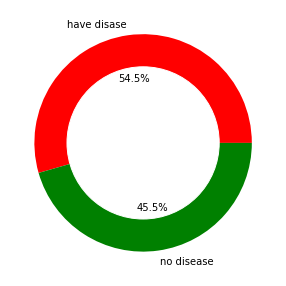

In [74]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(GroupedClass, 
        labels=['have disase','no disease'], 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Perform Data Augmentation menggunakan Pandas (sample) dan Sklearn (subsample)

In [76]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 150

random_states = [42, 123]

dfs = []

for i in range(len(GroupedClass)):
    dfs.append(Heart_Disease_df[Heart_Disease_df["target"] == i])
    if(GroupedClass[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

Heart_Disease_df=pd.concat(dfs)

In [77]:
GroupedClass = Heart_Disease_df["target"].value_counts()

GroupedClass

1    150
0    150
Name: target, dtype: int64

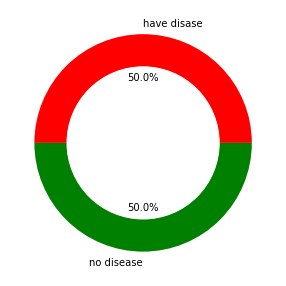

In [78]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(GroupedClass, 
        labels=['have disase','no disease'], 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()